# Pénzérme felismerés

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

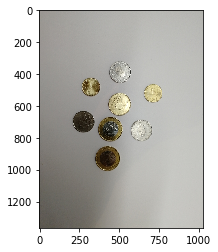

In [2]:
img = cv2.imread(os.path.join("proba_kepek_fix_tavolsag", "1.jpg"))

d = 1024 / img.shape[1]
dim = (1024, int(img.shape[0] * d))
resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized[:,:,::-1])
plt.show()

Az újraméretezett fotó.

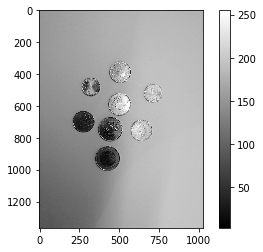

In [3]:
img_gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap = "gray")
plt.colorbar()
plt.show()

A vizsgált RGB kép szürkeárnyalatos képpé került konvertálásra.

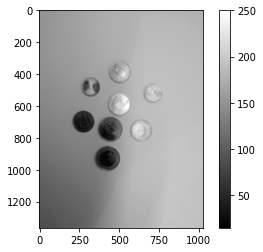

In [4]:
blur_img = cv2.GaussianBlur(img_gray,(21,21), 0)
plt.imshow(blur_img, cmap = "gray")
plt.colorbar()
plt.show()

Gaussian szűrő alkalmazása a fotón.

In [19]:
circles = cv2.HoughCircles(blur_img,cv2.HOUGH_GRADIENT,1,120,param1=50,param2=30, minRadius=60, maxRadius=120)
print("A megtalál körök egy tömben kerültek eltráolásra:",'\n')
print(circles)

print('\n',"A feldolgozott képen", circles.shape[1], "kör került feltalálásra.")



A megtalál körök egy tömben kerültek eltráolásra: 

[[[276.5 699.5  68. ]
  [426.5 929.5  78. ]
  [443.5 746.5  77.4]
  [504.5 389.5  69.2]
  [319.5 481.5  60.9]
  [502.5 589.5  64.8]]]

 A feldolgozott képen 6 kör került feltalálásra.


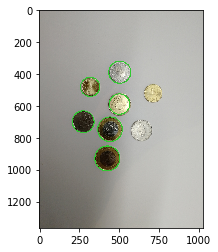

In [6]:
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(resized,(i[0],i[1]),i[2],(50,200,50),5)

plt.imshow(resized[:,:,::-1])
plt.show()

A megtalál körök kirajzolása.